<center><font color='red' size='5'>SALES PREDICTION USING PYTHON</font></center>




Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let's start the task of sales prediction with machine learning using Python.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
EDA=pd.DataFrame({'null':(df.isnull().sum()),'n_unique':(df.nunique()),'data_type':(df.dtypes)})
EDA

,null,n_unique,data_type
Unnamed: 0,0,200,int64
TV,0,190,float64
Radio,0,167,float64
Newspaper,0,172,float64
Sales,0,121,float64


In [4]:
EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Unnamed: 0 to Sales
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   null       5 non-null      int64 
 1   n_unique   5 non-null      int64 
 2   data_type  5 non-null      object
dtypes: int64(2), object(1)
memory usage: 160.0+ bytes


In [5]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df['Unnamed: 0']

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [8]:
df.drop(columns = ['Unnamed: 0'], axis=1, inplace = True)

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.size

800

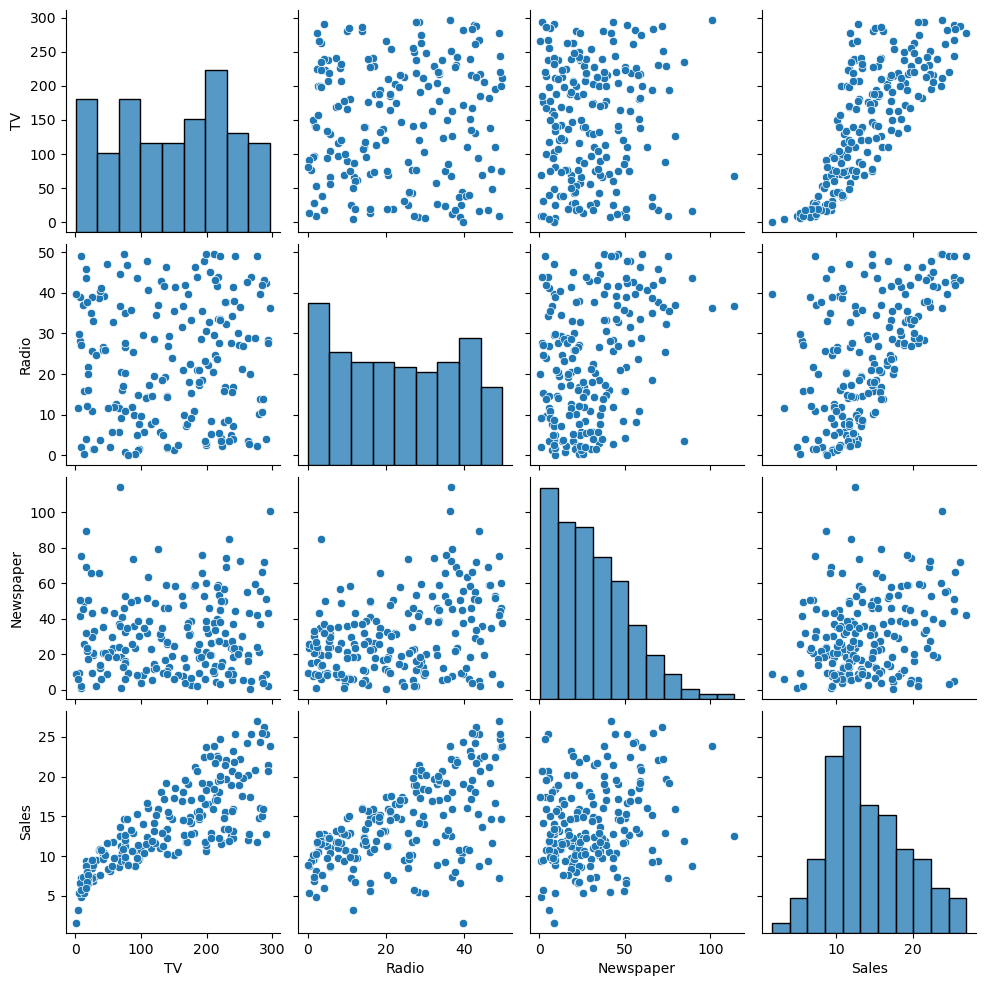

In [11]:
sns.pairplot(df)

In [12]:
df.boxplot()

<AxesSubplot:>

In [13]:
x=df.drop(['Sales'],axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [15]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# # Load your data into x and y variables
# x = ...
# y = ...

# Create a linear regression object and fit the model
linreg = LinearRegression()
linreg.fit(x, y)

# Make predictions using the trained model
y_pred = linreg.predict(x)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Calculate adjusted R^2
n = len(y)
p = x.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)


MSE: 2.784126314510936
RMSE: 1.6685701407225697
MAE: 1.2520112296870682
R2: 0.8972106381789522
Adjusted R2: 0.8956373316204668


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np



# Create a decision tree object and fit the model
# For Regression problem
dtree = DecisionTreeRegressor()
dtree.fit(x, y)

# For classification problem
# dtree = DecisionTreeClassifier()
# dtree.fit(x, y)

# Make predictions using the trained model
y_pred = dtree.predict(x)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Calculate adjusted R^2
n = len(y)
p = x.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# For classification problem
# Calculate accuracy
# accuracy = accuracy_score(y, y_pred)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

# For classification problem
# Print accuracy
# print("Accuracy:", accuracy)


MSE: 0.0
RMSE: 0.0
MAE: 0.0
R2: 1.0
Adjusted R2: 1.0


In [18]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import numpy as np



# Load your data into x and y variables   
# x = ...
# y = ...

# Create a random forest object and fit the model
# For Regression problem
rf = RandomForestRegressor()
rf.fit(x, y)

# For classification problem
# rf = RandomForestClassifier()
# rf.fit(x, y)

# Make predictions using the trained model
y_pred = rf.predict(x)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Calculate adjusted R^2
n = len(y)
p = x.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# For classification problem
# Calculate accuracy
# accuracy = accuracy_score(y, y_pred)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 0.07543156499999937
RMSE: 0.2746480748157528
MAE: 0.2061149999999988
R2: 0.9972150823807451
Adjusted R2: 0.9971724560906544


In [19]:
from sklearn.decomposition import PCA
import numpy as np

# Load your data into x variable
# x = ...

# Create a PCA object with the desired number of components
pca = PCA(n_components=3)

# Fit the PCA object to the data and transform the data
x_transformed = pca.fit_transform(x)

# Print the explained variance ratio of each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the total variance explained by all components
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.91415577 0.06398422 0.02186001]
Total variance explained: 1.0


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load your data into x and y variables
# x = ...
# y = ...

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameters to tune and their possible values
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(x, y)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.975566836081178


In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load your data into x and y variables
# x = ...
# y = ...

# Create a Lasso Regression object
lasso = Lasso()

# Define the hyperparameters to tune and their possible values
params = {
    'alpha': [0.001,0.01,0.1,1,20]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(x, y)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 1}
Best score: 0.8882007416256036


In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your data into x and y variables
# x = ...
# y = ...

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Lasso Regression object with the best hyperparameters
best_alpha = 0.01
lasso = Lasso(alpha=best_alpha)

# Train the Lasso regression model on the training set
lasso.fit(x_train, y_train)

# Use the trained model to make predictions on the testing set
y_pred = lasso.predict(x_test)

# Calculate various performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0] # number of samples in the testing set
p = x_test.shape[1] # number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("MAE:", mae)

MSE: 3.1737371981102056
RMSE: 1.7814985821241076
R-squared: 0.8994494345844187
Adjusted R-squared: 0.8910702207997869
MAE: 1.460659830407311


In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model with Ridge regularization
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

# Evaluate the model on the testing set
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = ridge.score(x_test, y_test)
n = x_test.shape[0] # number of samples in the testing set
p = x_test.shape[1] # number of features

#Print the evaluation metrics
print("MSE: ", mse)
print("RMSE: ", rmse)
print("r2", r2)

MSE:  3.1740970990047606
RMSE:  1.781599589976592
r2 0.899438032178932
